# COGS 108 - Final Project 

# Overview

*Fill in your overview here*

# Names

- Jialiang Ji
- Leyi Shang
- Yabo Shi
- Kegan Wong
- Tram Nguyen

# Group Members IDs

- A14711559 Jialiang Ji, jij106@ucsd.edu
- A13718465
- A########
- A########

# Research Question

The research question is that we want to find the relationship between the poverty and the percentage of the internet usage.

## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


*Fill in your hypotheses here*

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [1]:
## YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import datetime

# Significance Test
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# NLP
import re
from nltk.corpus import stopwords

# Data Cleaning

Describe your data cleaning steps here.

In [2]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION
# Load the dataset 
df = pd.read_csv("./new.csv")
df.head(n=800)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,UnderAge5inPovertyCountUB90%,90%ConfidenceInterval(UnderAge5inPovertyCount),UnderAge5inPovertyPercent,UnderAge5inPovertyPercentLB90%,UnderAge5inPovertyPercentUB90%,90%ConfidenceInterval(UnderAge5inPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [3]:
# drop irrevalent columns
df.drop(['UnderAge5inPovertyCountLB90%','UnderAge5inPovertyCount','UnderAge5SAIPEPovertyUniverse','90%ConfidenceInterval(UnderAge5inPovertyPercent)','UnderAge5inPovertyPercentUB90%','UnderAge5inPovertyPercentLB90%','UnderAge5inPovertyPercent','UnderAge5inPovertyCountUB90%','90%ConfidenceInterval(UnderAge5inPovertyCount)'], axis=1, inplace=True)

df.head(n=800)

,countyState,GEOID,lon,lat,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,...,Ages5to17inFamiliesinPovertyCountUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyCount),Ages5to17inFamiliesinPovertyPercent,Ages5to17inFamiliesinPovertyPercentLB90%,Ages5to17inFamiliesinPovertyPercentUB90%,90%ConfidenceInterval(Ages5to17inFamiliesinPovertyPercent),MedianHouseholdIncomeinDollars,MedianHouseholdIncomeinDollarsLB90%,MedianHouseholdIncomeinDollarsUB90%,90%ConfidenceInterval(MedianHouseholdIncomeinDollars)
0,Fairbanks North Star Borough (AK),05000US02090,-146.599867,64.690832,100605,75501.0,4385.0,3875.0,7427.0,503.0,...,1728,"928 to 1,728",8.5,5.9,11.1,5.9 to 11.1,"$74,241","$68,171","$80,311","$68,171 to $80,311"
1,Matanuska-Susitna Borough (AK),05000US02170,-149.407974,62.182173,104365,86314.0,1019.0,1083.0,5455.0,141.0,...,2712,"1,752 to 2,712",10.9,8.5,13.3,8.5 to 13.3,"$72,296","$67,381","$77,211","$67,381 to $77,211"
2,Baldwin County (AL),05000US01003,-87.746067,30.659218,208563,180484.0,18821.0,914.0,1383.0,0.0,...,6101,"3,641 to 6,101",14.3,10.7,17.9,10.7 to 17.9,"$56,607","$52,439","$60,775","$52,439 to $60,775"
3,Calhoun County (AL),05000US01015,-85.822513,33.771706,114611,NaN,NaN,NaN,NaN,NaN,...,4976,"3,066 to 4,976",22.2,16.9,27.5,16.9 to 27.5,"$45,937","$43,419","$48,455","$43,419 to $48,455"
4,Cullman County (AL),05000US01043,-86.869267,34.131923,82471,NaN,NaN,NaN,NaN,NaN,...,3072,"1,790 to 3,072",18.3,13.5,23.1,13.5 to 23.1,"$45,925","$41,985","$49,865","$41,985 to $49,865"
5,DeKalb County (AL),05000US01049,-85.803992,34.460929,70900,NaN,NaN,NaN,NaN,NaN,...,4197,"2,739 to 4,197",26.5,20.9,32.1,20.9 to 32.1,"$39,906","$36,346","$43,466","$36,346 to $43,466"
6,Elmore County (AL),05000US01051,-86.142739,32.597229,81799,NaN,NaN,NaN,NaN,NaN,...,2719,"1,541 to 2,719",15.9,11.5,20.3,11.5 to 20.3,"$59,652","$55,049","$64,255","$55,049 to $64,255"
7,Etowah County (AL),05000US01055,-86.034420,34.047638,102564,NaN,NaN,NaN,NaN,NaN,...,5144,"3,594 to 5,144",27.3,22.5,32.1,22.5 to 32.1,"$41,791","$38,946","$44,636","$38,946 to $44,636"
8,Houston County (AL),05000US01069,-85.296398,31.158193,104056,71838.0,27762.0,1054.0,443.0,0.0,...,4799,"3,585 to 4,799",23.8,20.3,27.3,20.3 to 27.3,"$44,753","$42,919","$46,587","$42,919 to $46,587"
9,Jefferson County (AL),05000US01073,-86.896536,33.553444,659521,340506.0,279979.0,8366.0,1799.0,323.0,...,25328,"19,258 to 25,328",20.8,18.0,23.6,18.0 to 23.6,"$50,731","$49,512","$51,950","$49,512 to $51,950"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 57 columns):
countyState                                                   816 non-null object
GEOID                                                         816 non-null object
lon                                                           816 non-null float64
lat                                                           816 non-null float64
P_total                                                       816 non-null int64
P_white                                                       604 non-null float64
P_black                                                       604 non-null float64
P_asian                                                       604 non-null float64
P_native                                                      604 non-null float64
P_hawaiian                                                    604 non-null float64
P_others                                                      604 non

In [5]:
df.drop(['StateCountyName', 'CountyID', 'State', 'Year', 'P_below_poverty','P_bachelor_and_above','P_some_college','P_high_school_equivalent','P_some_high_school','P_below_middle_school','lat','lon','GEOID'], axis=1, inplace=True)

In [6]:
df.describe()

,P_total,P_white,P_black,P_asian,P_native,P_hawaiian,P_others,median_age,gini_index,median_household_income,...,UnderAge18inPovertyPercent,UnderAge18inPovertyPercentLB90%,UnderAge18inPovertyPercentUB90%,Ages5to17inFamiliesSAIPEPovertyUniverse,Ages5to17inFamiliesinPovertyCount,Ages5to17inFamiliesinPovertyCountLB90%,Ages5to17inFamiliesinPovertyCountUB90%,Ages5to17inFamiliesinPovertyPercent,Ages5to17inFamiliesinPovertyPercentLB90%,Ages5to17inFamiliesinPovertyPercentUB90%
count,8.160000e+02,6.040000e+02,6.040000e+02,6.040000e+02,604.000000,604.000000,6.040000e+02,816.000000,816.000000,816.000000,...,816.000000,816.000000,816.000000,8.160000e+02,816.000000,816.000000,816.000000,816.000000,816.000000,816.000000
mean,3.347485e+05,2.893364e+05,5.624453e+04,2.789968e+04,2817.658940,892.518212,2.513647e+04,38.668505,0.451036,58109.235294,...,17.785417,14.504657,21.066176,5.474769e+04,9142.265931,7797.026961,10487.504902,16.637377,13.240319,20.034436
std,5.889744e+05,3.913786e+05,1.167363e+05,9.025087e+04,6951.336353,4565.854967,1.075837e+05,4.718818,0.035017,15292.580705,...,7.458418,6.510083,8.513823,9.635660e+04,19348.761398,18118.444069,20599.525029,7.237378,6.219177,8.377292
min,6.257000e+04,1.616200e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,6.400000e+01,24.600000,0.354400,31207.000000,...,2.700000,2.100000,3.300000,6.282000e+03,529.000000,374.000000,684.000000,2.300000,1.700000,2.900000
25%,9.593425e+04,1.018138e+05,4.381250e+03,1.977500e+03,379.500000,0.000000,1.615250e+03,35.900000,0.427050,47351.500000,...,12.275000,9.600000,14.800000,1.552750e+04,2363.750000,1787.250000,2948.500000,11.175000,8.600000,13.800000
50%,1.580710e+05,1.667300e+05,1.602400e+04,5.737000e+03,968.000000,112.000000,4.154500e+03,38.400000,0.450050,54575.000000,...,17.250000,14.000000,20.500000,2.607700e+04,3937.500000,3022.500000,4799.500000,16.100000,12.700000,19.500000
75%,3.355508e+05,3.382492e+05,5.148875e+04,1.889200e+04,2411.500000,390.500000,1.255975e+04,41.300000,0.473125,64911.000000,...,22.700000,18.700000,26.800000,5.606075e+04,8633.750000,7068.750000,10231.750000,21.300000,17.000000,25.425000
max,1.013792e+07,5.093898e+06,1.223763e+06,1.474575e+06,82300.000000,93165.000000,2.258451e+06,67.300000,0.594500,134464.000000,...,45.900000,39.700000,52.200000,1.577008e+06,321855.000000,309267.000000,334443.000000,46.200000,38.900000,53.500000


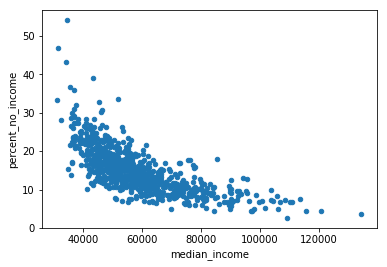

In [8]:
dataFile = pd.read_csv("./new.csv")
plt.scatter(dataFile.median_household_income, dataFile.percent_no_internet, s=20)
plt.xlabel('median_income')
plt.ylabel('percent_no_income')
f5 = plt.gcf()

In [9]:
def percentageEducated():
    list_PercentAboveHS = []
    list_PercentBelowHS = []
    sumTotal = 0
    sumBelowHS = 0
    
    for index,row in dataFile.iterrows():
        
        sumTotal = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent']+row['P_some_college']
                            +row['P_bachelor_and_above'])
        sumBelowHS = (row['P_below_middle_school'] + row['P_some_high_school']
                        +row['P_high_school_equivalent'])
        list_PercentBelowHS.append(sumBelowHS/sumTotal)
        list_PercentAboveHS.append(1-(sumBelowHS/sumTotal))
        
        
        
        
    dataFile['Percent_Population_Above_HS_Education'] = list_PercentAboveHS
    dataFile['Percent_Population_Below_HS_Education'] = list_PercentBelowHS        

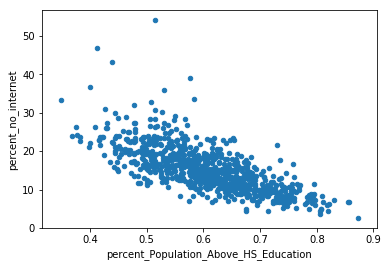

In [10]:
percentageEducated()
plt.scatter(dataFile.Percent_Population_Above_HS_Education, dataFile.percent_no_internet, s=20)
plt.xlabel('percent_Population_Above_HS_Education')
plt.ylabel('percent_no_internet')
f5 = plt.gcf()


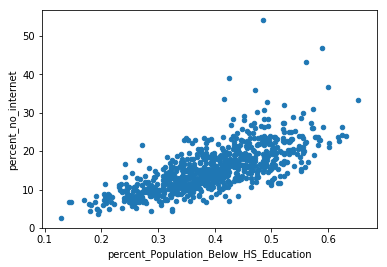

In [11]:
plt.scatter(dataFile.Percent_Population_Below_HS_Education, dataFile.percent_no_internet, s=20)
plt.xlabel('percent_Population_Below_HS_Education')
plt.ylabel('percent_no_internet')
f5 = plt.gcf()

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [7]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*